In [9]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow
from tensorflow import keras
from keras.preprocessing.image import img_to_array, load_img

In [40]:
img_dir = "img"

#predict model and display images
files=os.listdir(img_dir)
#print(files)
img=random.sample(files,5)

In [41]:
img

['065_0003.jpg',
 '12240303_80d87f77a3_n.jpg',
 '160954292_6c2b4fda65_n.jpg',
 '065_0012.jpg',
 '145862135_ab710de93c_n.jpg']

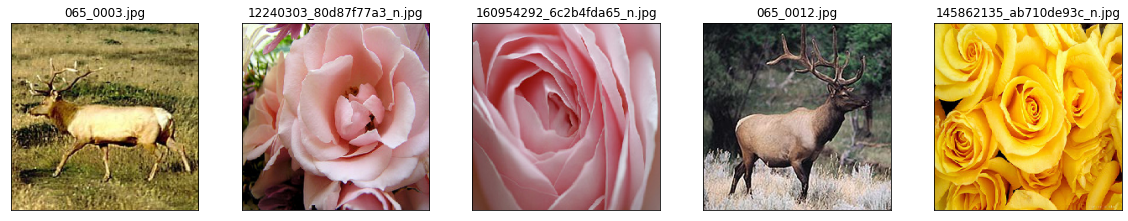

In [42]:
plt.figure(figsize=(20,20))
for i in range(5):
    temp_img=load_img(os.path.join(img_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    plt.title(img[i])
    plt.xticks([]),plt.yticks([])


plt.show()

In [43]:
# 画像データをAverage hashに変換
def average_hash(file, size):
    img = Image.open(file)
    img = img.convert('L').resize((size, size), Image.ANTIALIAS) # グレースケール変換
    px = np.array(img.getdata()).reshape((size, size))  # リサイズ
    avg = px.mean()  # 画素値の平均値を取得
    px = 1 * (px > avg)   # 画素データ（px）で平均より大きい要素を1に、それ以外は0に変換
    return px

In [44]:
a = average_hash("img/"+ img[0], 64)

In [45]:
a.reshape(64*64)

array([0, 0, 0, ..., 0, 1, 1])

In [46]:
ahash = np.zeros((5, 64*64))

for i in range(5):
  a = average_hash("img/"+ img[i], 64)
  ahash[i] = a.reshape(64*64)

In [47]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [54]:
distance = np.zeros(5)
distance[0] = np.sum(np.dot(ahash[1], ahash[0]))
distance[1] = np.sum(np.dot(ahash[1], ahash[1]))
distance[2] = np.sum(np.dot(ahash[1], ahash[2]))
distance[3] = np.sum(np.dot(ahash[1], ahash[3]))
distance[4] = np.sum(np.dot(ahash[1], ahash[4]))

k=5
sorted_indexes = np.argsort(distance)
#max_k = sorted_indexes[-(k+1):-1]
min_k = sorted_indexes[:k+1]
        
print(distance)
print(np.flip(sorted_indexes))



[1221. 2454. 1358.  886. 1628.]
[1 4 2 0 3]


1
4
2
0
3


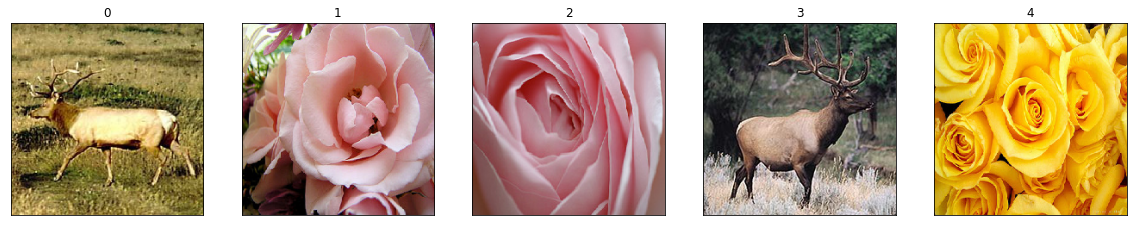

In [60]:
# Ranking
plt.figure(figsize=(20,20))
for i in np.flip(sorted_indexes):
    print (i)
    temp_img=load_img(os.path.join(img_dir,img[i]),target_size=(224,224))
    plt.subplot(len(img)/5 + 1,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    plt.title(i)
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()